# The Spark Foundation #GRIPJUNE2021


# Task-1 Exploratory Data Analysis - Retail Store

## Author-Bhanu Krishna Prasad.V

#### Task: Perform a analysis on the store dataset and find out  the weak areas where you can work to make more profit.

We will be doing a analysis on the data ofa retail store and we will find out what are the challenges being faced by the owners and what improvements can be made to overcome the issues.
Link to the dataset:https://drive.google.com/file/d/1lV7is1B566UQPYzzY8R2ZmOritTW299S/view

## Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np

#### Reading the dataset

In [2]:
store_data=pd.read_csv('./SampleSuperstore.csv')

In [3]:
store_data

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [4]:
store_data.sample(15)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
4546,Second Class,Consumer,United States,Chicago,Illinois,60610,Central,Office Supplies,Binders,1.928,2,0.8,-2.9884
5610,First Class,Consumer,United States,Cincinnati,Ohio,45231,East,Technology,Accessories,53.040,3,0.2,-4.6410
7932,Standard Class,Corporate,United States,Portland,Oregon,97206,West,Office Supplies,Paper,105.520,5,0.2,34.2940
120,First Class,Consumer,United States,Wilmington,Delaware,19805,East,Office Supplies,Binders,30.840,4,0.0,13.8780
6852,Second Class,Corporate,United States,Little Rock,Arkansas,72209,South,Office Supplies,Storage,62.040,4,0.0,17.3712
4134,Standard Class,Consumer,United States,Chesapeake,Virginia,23320,South,Technology,Machines,209.970,3,0.0,90.2871
8078,Standard Class,Corporate,United States,East Point,Georgia,30344,South,Technology,Accessories,75.000,3,0.0,18.0000
5879,Standard Class,Consumer,United States,New York City,New York,10011,East,Office Supplies,Paper,192.160,4,0.0,92.2368
2929,Standard Class,Home Office,United States,Saginaw,Michigan,48601,Central,Furniture,Furnishings,19.760,4,0.0,8.2992
8138,Standard Class,Home Office,United States,Philadelphia,Pennsylvania,19140,East,Office Supplies,Art,11.264,8,0.2,1.2672


#### From the above sample data I have found that the country has been same in all the entires.Postal code and City name doesn't help us or they don't have any significance in the analysis

## Data Cleaning

In [5]:
data_df=store_data[['Ship Mode', 'Segment','State','Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount','Profit']]
data_df

,Ship Mode,Segment,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,Florida,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,California,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,California,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,California,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


#### Now I have removed some of the columns and selected the columns which have some significance

In [6]:
data_df.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


There is significant deviation in the sales price as there are goods from different category and it's same with the profits too.

In [7]:
#Finding the repeated entires
data_df.duplicated().sum()

137

In [8]:
#Deleteing the repeated entries
data_df.drop_duplicates(inplace=True)

<ipython-input-8-c19fac4baee0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df.drop_duplicates(inplace=True)


## Let us now check which category has more number of sales

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline
from plotnine import *
from plotly.subplots import make_subplots

In [10]:
data_df.Category.unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [11]:
category_counts=data_df.Category.value_counts()

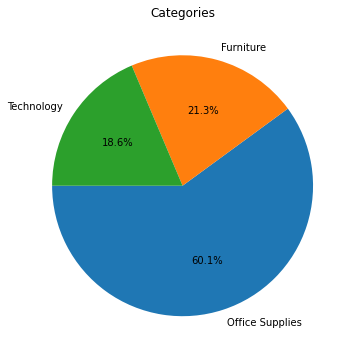

In [12]:
plt.figure(figsize=(12,6))
plt.title("Categories")
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=180);

There are more entries for the Office Supplies categorey

<AxesSubplot:title={'center':'Category vs Sales'}, xlabel='Category', ylabel='Sales'>

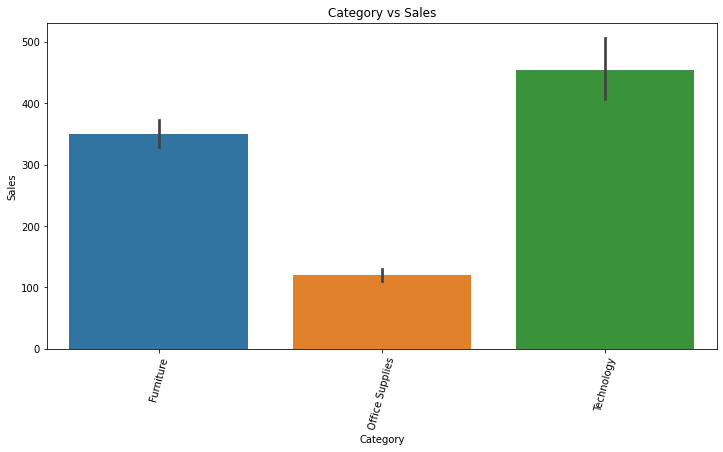

In [13]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title("Category vs Sales")
sns.barplot(x='Category',y='Sales',data=data_df)

In [14]:
furn=data_df[data_df.Category=='Furniture']
furn

,Ship Mode,Segment,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
3,Standard Class,Consumer,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
5,Standard Class,Consumer,California,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
10,Standard Class,Consumer,California,West,Furniture,Tables,1706.1840,9,0.20,85.3092
...,...,...,...,...,...,...,...,...,...,...
9962,First Class,Home Office,Texas,Central,Furniture,Bookcases,383.4656,4,0.32,-67.6704
9964,Second Class,Corporate,Delaware,East,Furniture,Furnishings,13.4000,1,0.00,6.4320
9980,Second Class,Consumer,Louisiana,South,Furniture,Tables,85.9800,1,0.00,22.3548
9989,Second Class,Consumer,Florida,South,Furniture,Furnishings,25.2480,3,0.20,4.1028


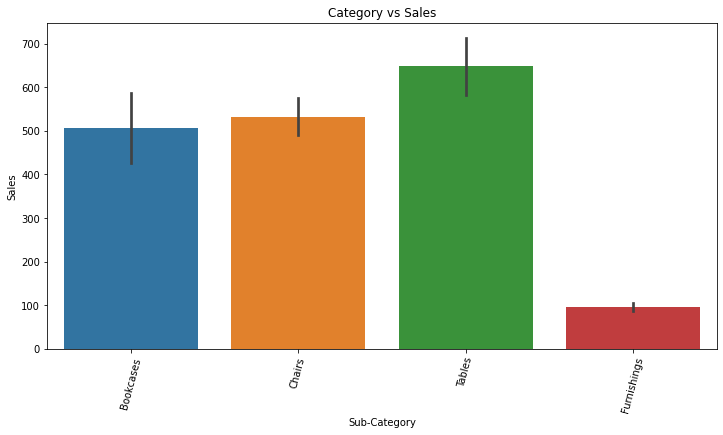

In [15]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title("Category vs Sales")
sns.barplot(x='Sub-Category',y='Sales',data=furn);

In [16]:
off=data_df[data_df.Category=='Office Supplies']
off

,Ship Mode,Segment,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
2,Second Class,Corporate,California,West,Office Supplies,Labels,14.620,2,0.0,6.8714
4,Standard Class,Consumer,Florida,South,Office Supplies,Storage,22.368,2,0.2,2.5164
6,Standard Class,Consumer,California,West,Office Supplies,Art,7.280,4,0.0,1.9656
8,Standard Class,Consumer,California,West,Office Supplies,Binders,18.504,3,0.2,5.7825
9,Standard Class,Consumer,California,West,Office Supplies,Appliances,114.900,5,0.0,34.4700
...,...,...,...,...,...,...,...,...,...,...
9982,Standard Class,Consumer,Michigan,Central,Office Supplies,Paper,35.560,7,0.0,16.7132
9984,Standard Class,Consumer,New York,East,Office Supplies,Labels,31.500,10,0.0,15.1200
9985,Standard Class,Consumer,New York,East,Office Supplies,Supplies,55.600,4,0.0,16.1240
9992,Standard Class,Consumer,California,West,Office Supplies,Paper,29.600,4,0.0,13.3200


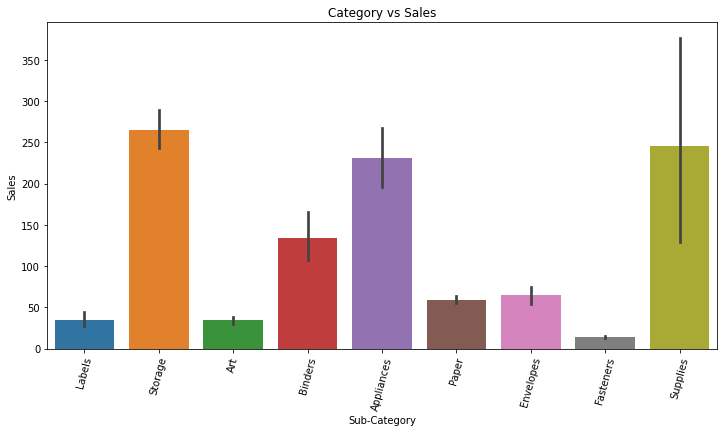

In [17]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title("Category vs Sales")
sns.barplot(x='Sub-Category',y='Sales',data=off);

In [18]:
tech=data_df[data_df.Category=='Technology']
tech

,Ship Mode,Segment,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
7,Standard Class,Consumer,California,West,Technology,Phones,907.152,6,0.2,90.7152
11,Standard Class,Consumer,California,West,Technology,Phones,911.424,4,0.2,68.3568
19,Second Class,Consumer,California,West,Technology,Phones,213.480,3,0.2,16.0110
26,Second Class,Consumer,California,West,Technology,Accessories,90.570,3,0.0,11.7741
35,First Class,Corporate,Texas,Central,Technology,Phones,1097.544,7,0.2,123.4737
...,...,...,...,...,...,...,...,...,...,...
9976,Standard Class,Home Office,California,West,Technology,Phones,249.584,2,0.2,31.1980
9983,Standard Class,Consumer,Michigan,Central,Technology,Phones,97.980,2,0.0,27.4344
9987,Standard Class,Corporate,Georgia,South,Technology,Accessories,79.990,1,0.0,28.7964
9988,Standard Class,Corporate,Georgia,South,Technology,Phones,206.100,5,0.0,55.6470


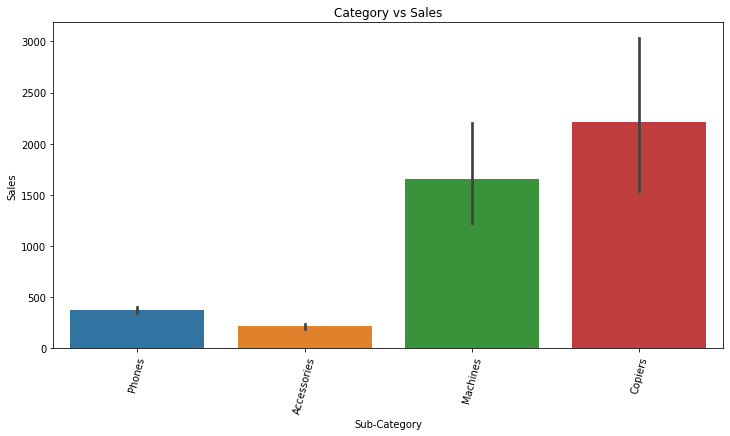

In [19]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title("Category vs Sales")
sns.barplot(x='Sub-Category',y='Sales',data=tech);

#### From the above visulatisation it is clear that there 3 main catrgories under which the store sell thier products and each category has it's own sub-categories.

Technology have more sales compared to the other categories

Tables were under more demand in the Funiture categorey
Under office category more orders are for Storage,appliances and supplies
And coming to the Technology category copiers have more demand

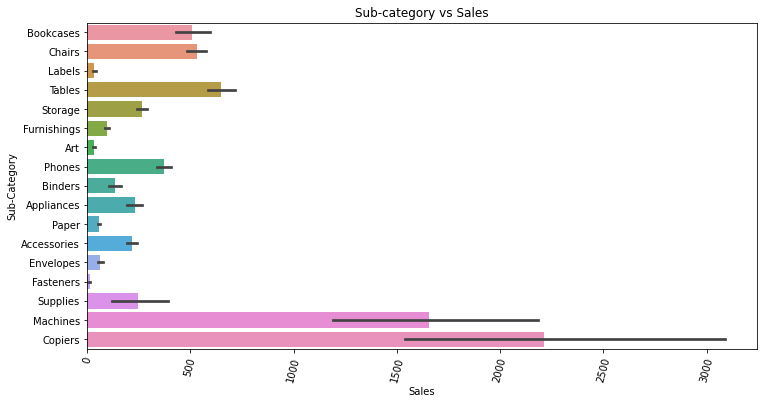

In [20]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title("Sub-category vs Sales")
sns.barplot(y='Sub-Category',x='Sales',data=data_df);

Out of all the sub categories copiers and machines are under high demand which belong to the same category and which in return provides more sales for the technology category

## Comparing the profits of categories and sub-categories


In [21]:
temp_df=data_df.groupby(['Category']).sum()

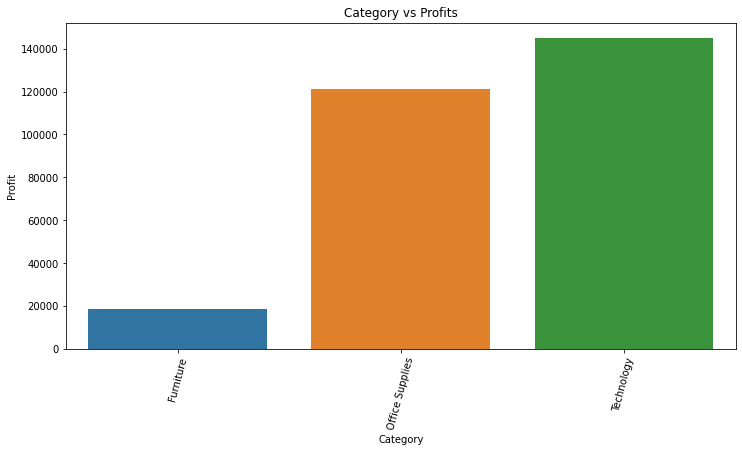

In [22]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title("Category vs Profits")
sns.barplot(x=temp_df.index,y='Profit',data=temp_df);

Technology category have huge profits compared to the other categories and moreover furniture has more sales than Office suplies but ended up with more loses

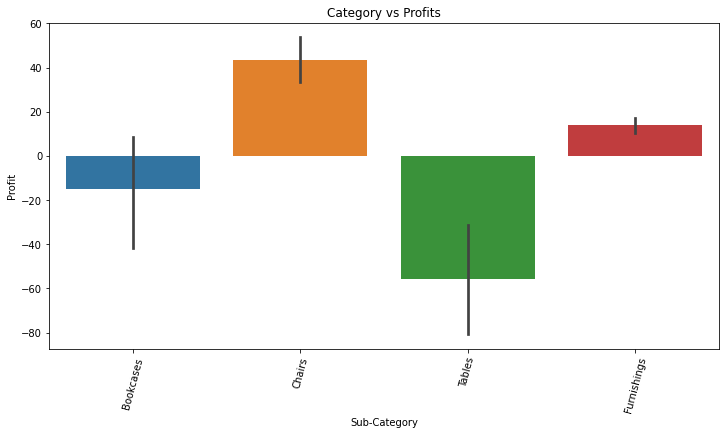

In [23]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title("Category vs Profits")
sns.barplot(x='Sub-Category',y='Profit',data=furn);

#### Tables have high sales and as well as more losses.I think the store must stop selling or reduce the sales of the tables under the furniture category

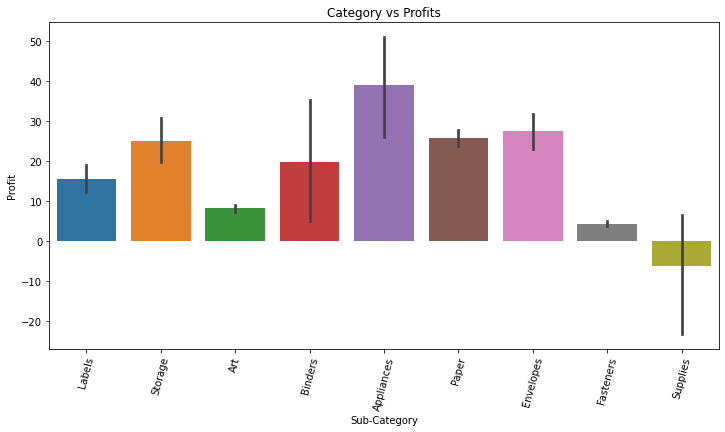

In [24]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title("Category vs Profits")
sns.barplot(x='Sub-Category',y='Profit',data=off);

#### The profits under the office category is pretty much decent as the most selling items are giving the returns on the same extent expect with the supplies,the store can reduce the number of sales of supplies for a while

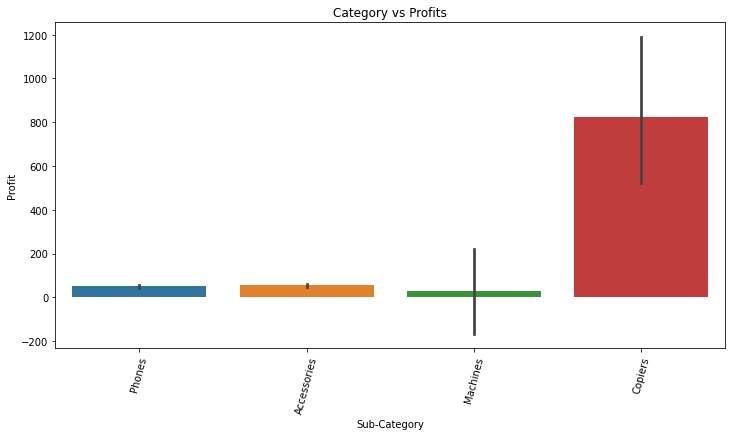

In [25]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title("Category vs Profits")
sns.barplot(x='Sub-Category',y='Profit',data=tech);

#### The copiers are providing the major amount of profits to the store,even machines are sold at high numbers still it has considerable loses

/home/bhanu/.local/lib/python3.9/site-packages/mizani/palettes.py:397: UserWarning: Warning message:Brewer palette Spectral has a maximum of 11 colors Returning the palette you asked for with that many colors
/home/bhanu/.local/lib/python3.9/site-packages/mizani/palettes.py:397: UserWarning: Warning message:Brewer palette Spectral has a maximum of 11 colors Returning the palette you asked for with that many colors


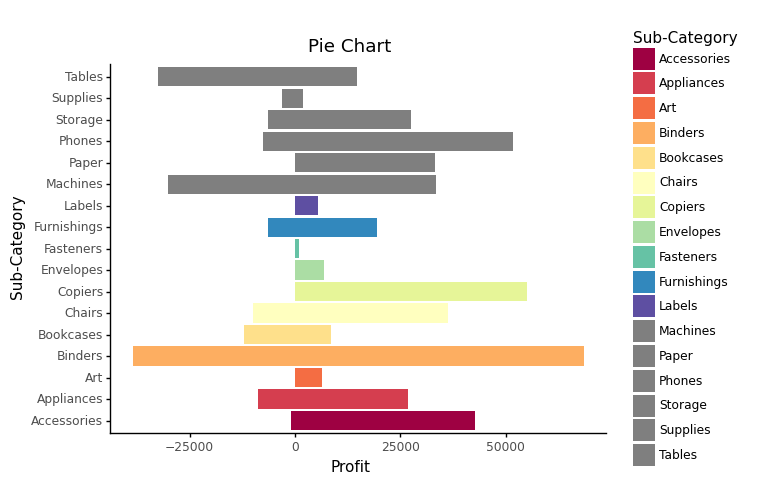

<ggplot: (8735760242670)>

In [26]:
Profit_ploting =(ggplot(data_df, aes(x = 'Sub-Category',y ='Profit',fill = 'Sub-Category')) + geom_col() + coord_flip() + 
              scale_fill_brewer(type='div',palette= 'Spectral')+ theme_classic() + ggtitle('Pie Chart'))
display(Profit_ploting);

### Discount vs Profits

/home/bhanu/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


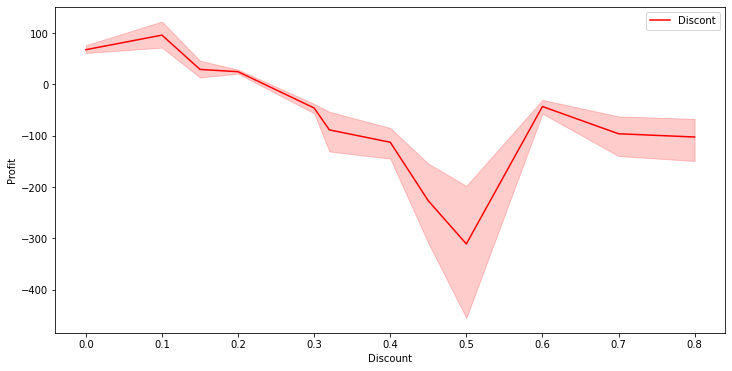

In [27]:
plt.figure(figsize = (12,6))
sns.lineplot("Discount","Profit",data =data_df, color= 'red',label= 'Discont')
plt.legend()
plt.show()

#### There is no clear relation between the profits and discounts and moreover we have a good profits when there is no discount, this is something the store must look into 

### Comparision between the states and their frequency

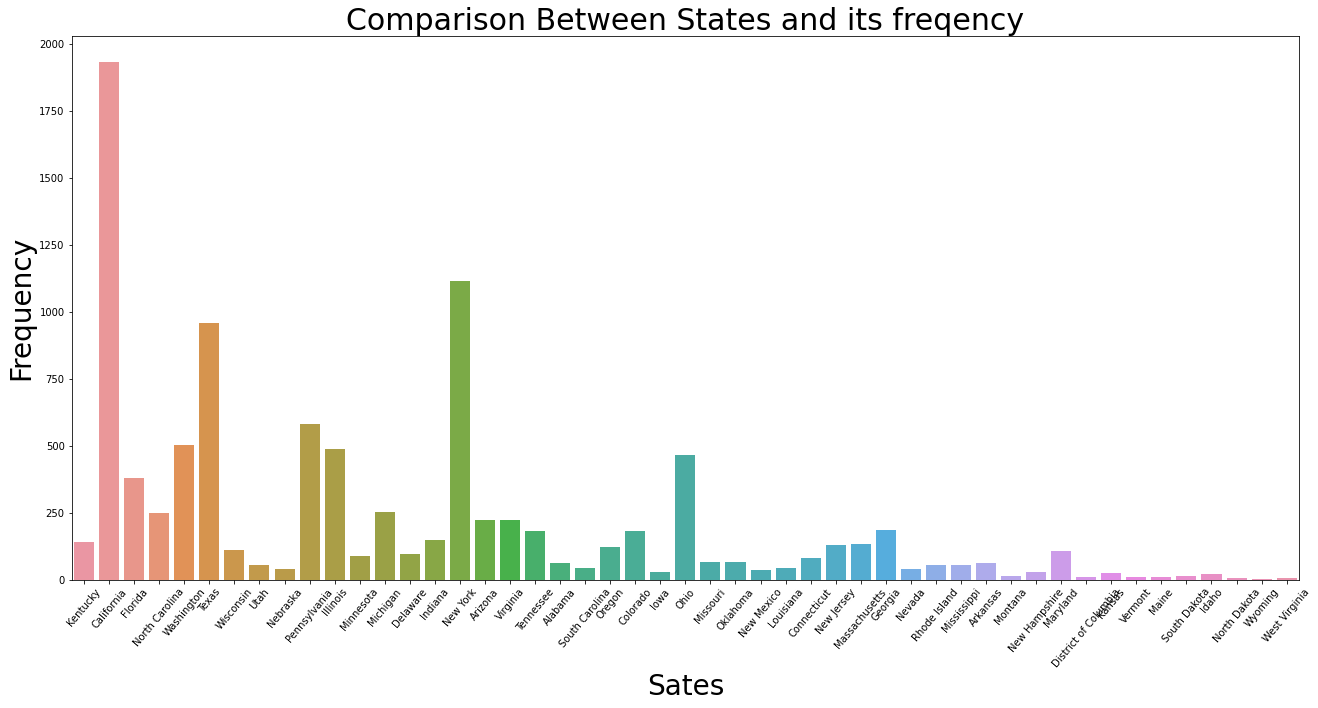

In [28]:
plt.figure(figsize=(22,10))
sns.countplot(x=data_df['State'])
plt.title('Comparison Between States and its freqency',size = '30')
plt.xlabel('Sates',size='28',color = 'black')
plt.ylabel('Frequency',size='28',color = 'black')
plt.xticks(rotation=50)
plt.show()

In [29]:
def state_data_viewer(states):
    product_data = data_df.groupby(['State'])
    for state in states:
        data = product_data.get_group(state).groupby(['Category'])
        fig,ax =plt.subplots(1, 3, figsize= (20,4))
        fig.suptitle(state, fontsize=14)
        ax_index =0
        for cat in ['Furniture', 'Office Supplies', 'Technology']:
            cat_data = data.get_group(cat).groupby(['Sub-Category']).sum()
            sns.barplot(x=cat_data.Profit, y= cat_data.index, ax =ax[ax_index])
            ax[ax_index].set_ylabel(cat)
            ax_index+=1
        
        fig.show()

### I have selected the top 5 countries with maximum sales and displaying their profits

In [31]:
state_counts=data_df.State.value_counts()

In [32]:
states=state_counts.head(5).index
states

Index(['California', 'New York', 'Texas', 'Pennsylvania', 'Washington'], dtype='object')

<ipython-input-29-5a23607430e3>:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
<ipython-input-29-5a23607430e3>:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
<ipython-input-29-5a23607430e3>:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
<ipython-input-29-5a23607430e3>:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
<ipython-input-29-5a23607430e3>:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


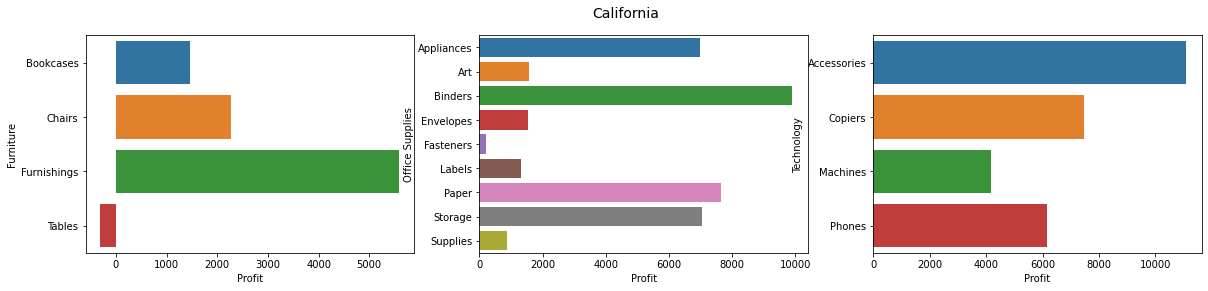

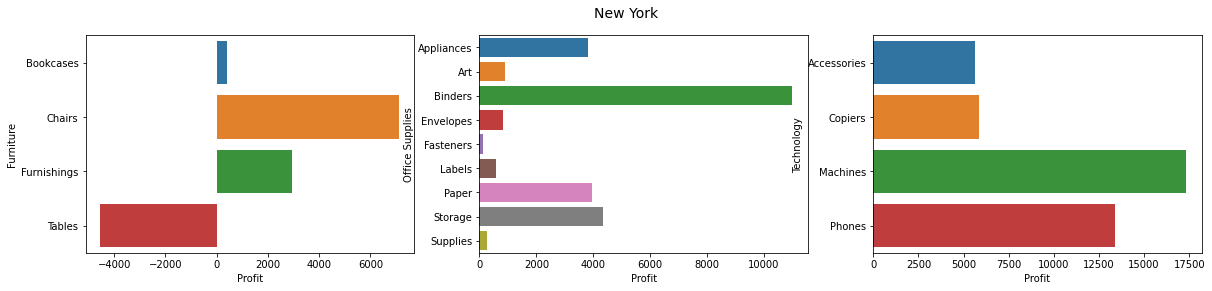

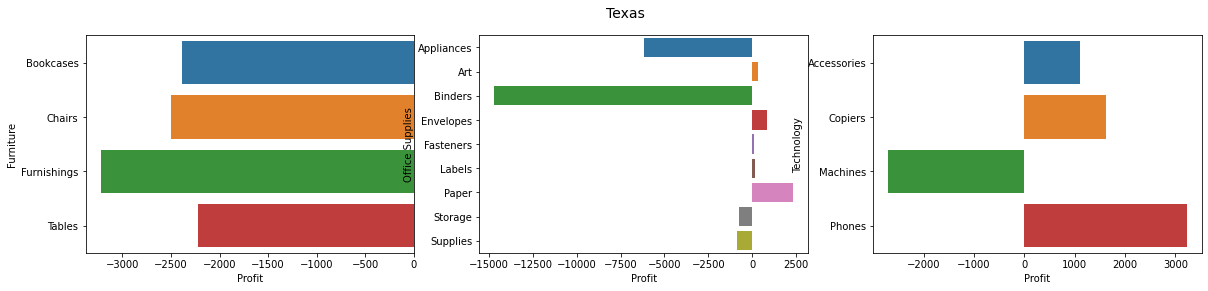

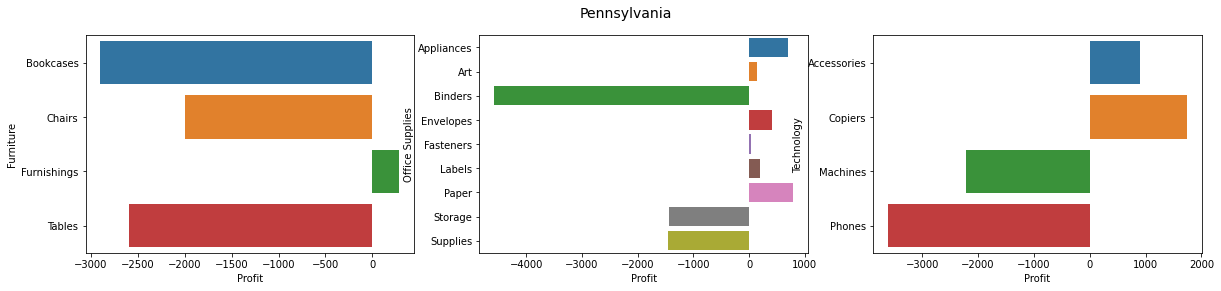

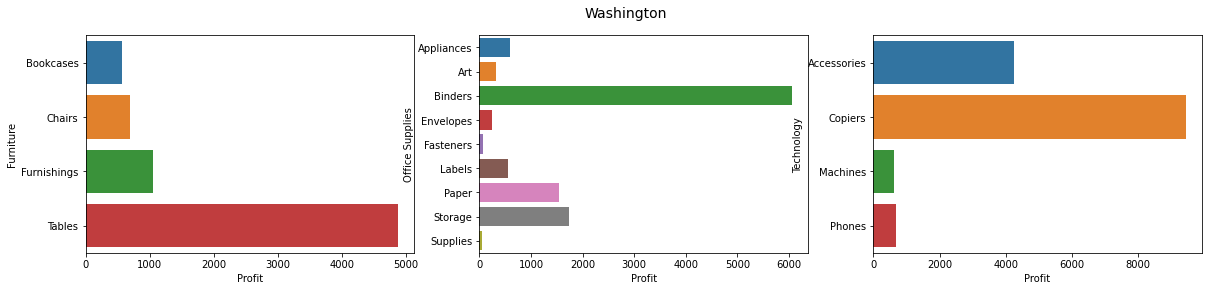

In [33]:
state_data_viewer(states)

#### The furniture category is under huge loses in Texas and Pennsylvania, and the store must focus on their table sales in New York

#### Blinders are not providing any profits in Texas and Pennsylvania and same with the Machines

## Sales in different regions in USA

In [34]:
data_df.sample(5)

,Ship Mode,Segment,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
1876,Standard Class,Consumer,Texas,Central,Technology,Phones,470.376,3,0.2,47.0376
270,Second Class,Corporate,California,West,Office Supplies,Storage,725.840,4,0.0,210.4936
803,Standard Class,Corporate,Louisiana,South,Office Supplies,Paper,12.960,2,0.0,6.2208
1002,Same Day,Consumer,New York,East,Furniture,Tables,1090.782,7,0.4,-290.8752
2121,First Class,Corporate,California,West,Furniture,Chairs,215.976,3,0.2,-2.6997


In [35]:
region_counts=data_df.Region.value_counts()

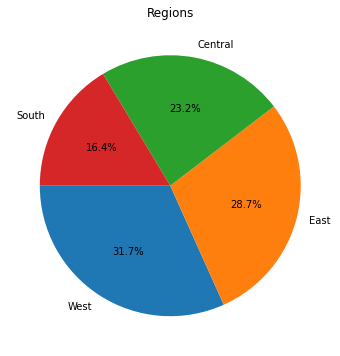

In [36]:
plt.figure(figsize=(12,6))
plt.title("Regions")
plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%', startangle=180);

#### There more number of entries from west and least from the south of United Sates

In [37]:
gropued_df=data_df.groupby(['Region']).sum()

In [38]:
gropued_df

,Sales,Quantity,Discount,Profit
Region,,,,
Central,499289.7988,8684,549.84,39609.7329
East,677401.6200,10559,411.70,91316.2293
South,391374.3610,6190,237.95,46619.3659
West,716812.2355,12033,345.20,106926.8329


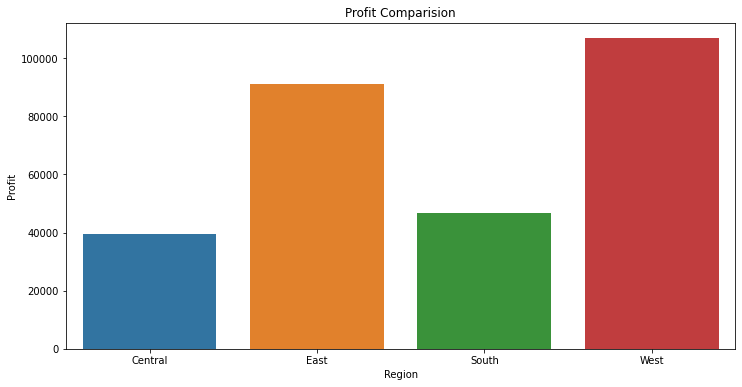

In [39]:
plt.figure(figsize=(12,6))
plt.title("Profit Comparision")
sns.barplot(x=gropued_df.index,y='Profit',data=gropued_df);

### The west region returns are hight compared to the other regions,east region returns are close to west region results
### Now let us check the categories that are being sold in different regions 

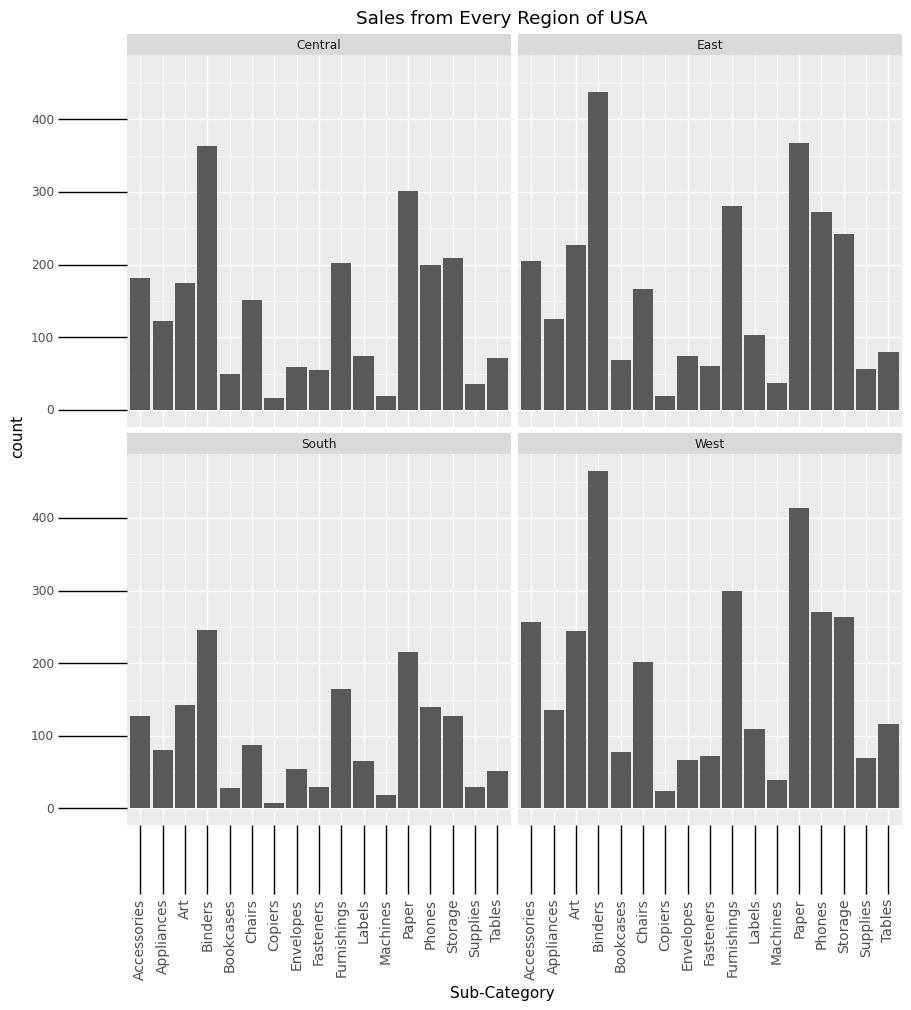

<ggplot: (8735868257410)>

In [40]:
flip_xlabels = theme(axis_text_x = element_text(angle=90, hjust=10),figure_size=(10,10),axis_ticks_length_major=50,axis_ticks_length_minor=50)
(ggplot(data_df, aes(x='Sub-Category', fill='Sales'))+ geom_bar()+ facet_wrap(['Region'])+flip_xlabels +
 theme(axis_text_x = element_text(size=10))+ggtitle("Sales from Every Region of USA"))

In [43]:
def region_data_viewer(regions):
    product_data = data_df.groupby(['Region'])
    for region in regions:
        data = product_data.get_group(region).groupby(['Category'])
        fig,ax =plt.subplots(1, 3, figsize= (20,4))
        fig.suptitle(region, fontsize=14)
        ax_index =0
        for cat in ['Furniture', 'Office Supplies', 'Technology']:
            cat_data = data.get_group(cat).groupby(['Sub-Category']).sum()
            sns.barplot(x=cat_data.Profit, y= cat_data.index, ax =ax[ax_index])
            ax[ax_index].set_ylabel(cat)
            ax_index+=1
        
        fig.show()

In [44]:
regions=data_df.Region.unique()

<ipython-input-43-49de1283fc0e>:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
<ipython-input-43-49de1283fc0e>:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
<ipython-input-43-49de1283fc0e>:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
<ipython-input-43-49de1283fc0e>:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


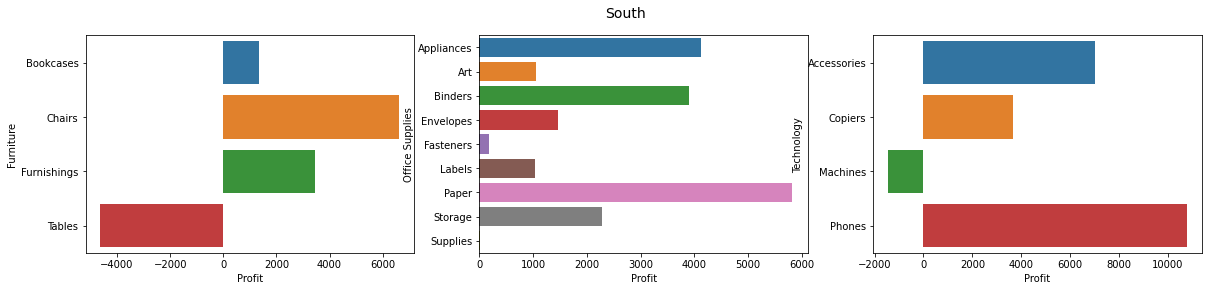

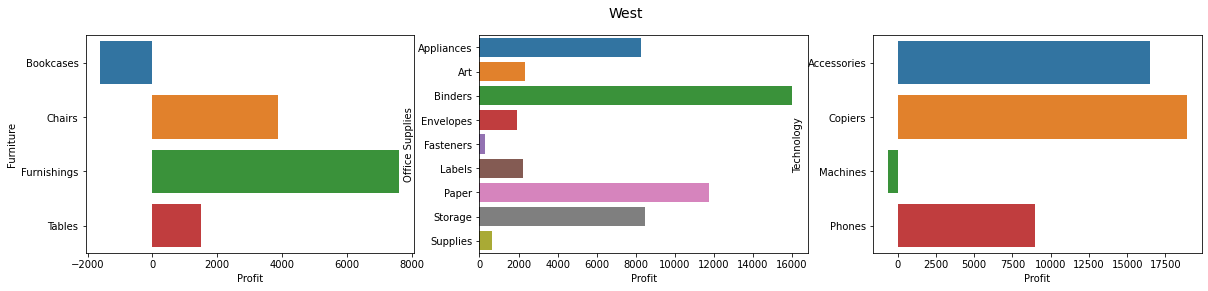

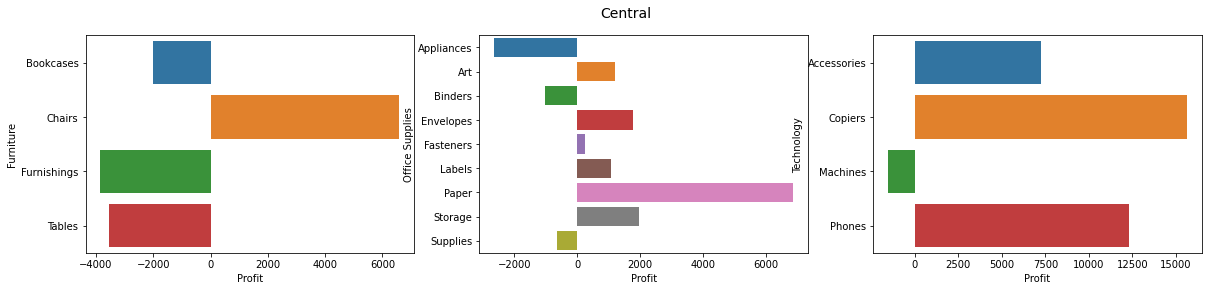

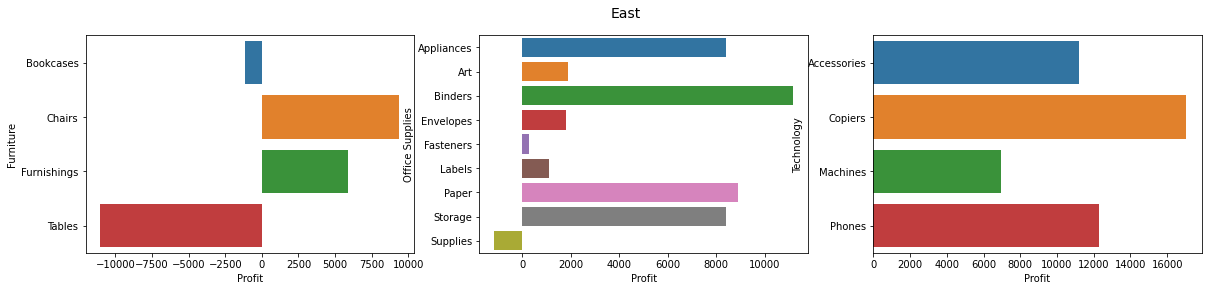

In [46]:
region_data_viewer(regions)

# CONCLUSION:
#### 1.There are more sales and more returns for Office Supplies.
#### 2.The furniture products sales are not that good and moreover they look like a burdern to the company in most of the places ecspecially in Texas and Pennsylvania
#### 3.Tables sales are under heavy loses,they must reduce the table sales
#### 4.California has good returns in all the categories and they can expan thier bussiness in California
#### 5.South has less sales and retunrns compared to the other regions,if they can increase the sales they can get better returns from the south
#### 6.The discount strategy is not working,they must re consider it